In [1]:
k = 1

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_2D, WGAN_Model_2D


# Load data

In [3]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "sinus" #sinus, helix
n_instance = 1000
n_features = 2
n_var =int(vars[0,j])
latent_space =6 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 1000 #1000
bias = [True,False]
use_bias = True

[2. 0. 0. 0. 0. 0.]


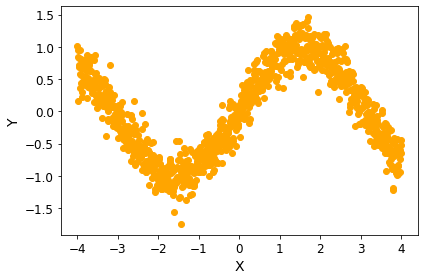

In [4]:
X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

plt.scatter(X_train,y_train, c='orange', label='Sample Data')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# WGAN

### Architecture

In [6]:
generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_2D.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                210       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [7]:
wgan = WGAN_Model_2D.WGAN(k,n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 852       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 3,413
Trainable params: 3,313
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [8]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


In [9]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


## Training

Epoch 1/1000
critic: 6.205207 - generator: -0.042842 - 3s
Epoch 2/1000
critic: 0.806857 - generator: -0.009866 - 0s
Epoch 3/1000
critic: 0.103275 - generator: -0.002285 - 0s
Epoch 4/1000
critic: 0.037337 - generator: -0.001208 - 0s
Epoch 5/1000
critic: 0.029817 - generator: -0.002042 - 0s
Epoch 6/1000
critic: 0.033900 - generator: -0.002880 - 0s
Epoch 7/1000
critic: 0.036657 - generator: -0.007741 - 0s
Epoch 8/1000
critic: 0.035029 - generator: -0.006034 - 0s
Epoch 9/1000
critic: 0.025059 - generator: -0.001141 - 0s
Epoch 10/1000
critic: 0.038578 - generator: -0.002023 - 0s
Epoch 11/1000
critic: 0.032959 - generator: -0.005977 - 0s
Epoch 12/1000
critic: 0.027444 - generator: -0.006773 - 0s
Epoch 13/1000
critic: 0.021534 - generator: -0.008210 - 0s
Epoch 14/1000
critic: 0.013784 - generator: -0.008936 - 0s
Epoch 15/1000
critic: 0.026443 - generator: -0.008975 - 0s
Epoch 16/1000
critic: 0.027282 - generator: -0.006858 - 0s
Epoch 17/1000
critic: 0.027708 - generator: -0.010442 - 0s
Epoch 

critic: 0.013747 - generator: -0.045361 - 0s
Epoch 141/1000
critic: 0.019252 - generator: -0.045647 - 0s
Epoch 142/1000
critic: 0.017735 - generator: -0.047739 - 0s
Epoch 143/1000
critic: 0.033991 - generator: -0.041011 - 0s
Epoch 144/1000
critic: 0.020923 - generator: -0.043291 - 0s
Epoch 145/1000
critic: 0.019998 - generator: -0.040033 - 0s
Epoch 146/1000
critic: 0.015870 - generator: -0.042210 - 0s
Epoch 147/1000
critic: 0.021207 - generator: -0.041769 - 0s
Epoch 148/1000
critic: 0.023449 - generator: -0.040231 - 0s
Epoch 149/1000
critic: 0.018784 - generator: -0.037916 - 0s
Epoch 150/1000
critic: 0.025368 - generator: -0.041544 - 0s
Epoch 151/1000
critic: 0.029363 - generator: -0.036227 - 0s
Epoch 152/1000
critic: 0.023105 - generator: -0.038744 - 0s
Epoch 153/1000
critic: 0.014498 - generator: -0.039919 - 0s
Epoch 154/1000
critic: 0.028196 - generator: -0.038466 - 0s
Epoch 155/1000
critic: 0.025060 - generator: -0.037651 - 0s
Epoch 156/1000
critic: 0.020928 - generator: -0.037014 

NameError: name 'k' is not defined

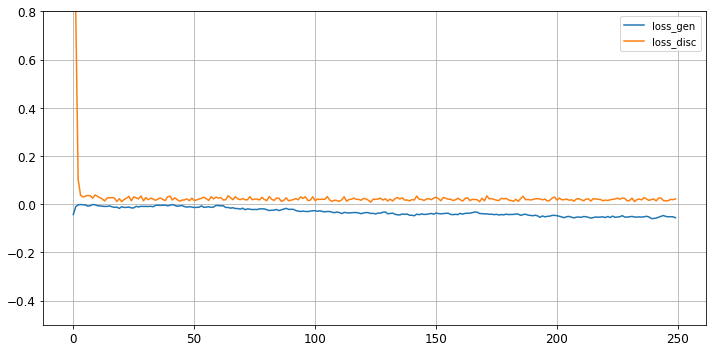

In [10]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [ ]:
k=1
epoch = 750

In [ ]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

In [ ]:
generator = keras.models.load_model('GANS/Models/generator_v'+str(k)+'_epochs_'+str(epoch)+'.h5')

In [ ]:
from PIL import Image

#Discriminator Loss
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[15,10])
plt.imshow(result)

In [ ]:
from PIL import Image

#Discriminator Loss
countour_line = Image.open('GANS/Result/'+'countour_line_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[15,10])
plt.imshow(countour_line)

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)
        
#predict the labels of the data values on the basis of the trained model.
predicted_values = generator.predict(latent_values)

predicted_values[:,:]=(predicted_values[:,:])
predicted_values2 = scaler.inverse_transform(predicted_values)



f1 = interp1d(predicted_values2[:,0], predicted_values2[:,1], kind = 'Quadratic')
#f2 = interp1d(predicted_values2[:,0], predicted_values2[:,1], kind = 'cubic')
        
xnew = np.linspace(-3, 3, 2000)

plt.plot(predicted_values2[:,0], predicted_values2[:,1], 'o', xnew, f1(xnew), '-')
plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')
plt.show()

### Applying the prediction function

## Fixed Input

In [ ]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

print("predict1",predict1.shape)
predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
print("predictthis",predictthis.shape)

predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
X_generated = wgan.predict(input_test, scaler) #wagn.predict

In [ ]:
print("Generated Data:",X_generated.shape)

plt.scatter(X_train, y_train,label="Sample Data")
plt.scatter(X_generated[:,0],X_generated[:,1])
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()